In [ ]:
from networkx import radius
import pandas as pd
import numpy as np

# function input0x input0y input1x input1y input2x input2y input3x input3y

op_dict = {0: '+', 1: '-', 2: '*', 3: '/', 4: 'IN'}

class Node:
    def __init__(self, x, y, function, input0x=None, input0y=None, input1x=None, input1y=None, input2x=None, input2y=None, input3x=None, input3y=None):
        self.x = x
        self.y = y
        self.function = function
        self.input0x = input0x
        self.input0y = input0y
        self.input1x = input1x
        self.input1y = input1y
        self.input2x = input2x
        self.input2y = input2y
        self.input3x = input3x
        self.input3y = input3y

    def __str__(self):
        op = op_dict.get(self.function, '?')
        return f"Node(({self.x}, {self.y}), function={op}, inputs=({self.input0x},{self.input0y}),({self.input1x},{self.input1y}),({self.input2x},{self.input2y}),({self.input3x},{self.input3y}))"

    def __repr__(self):
        return self.__str__()

def decode_nodes(arr):
    nodes = []
    # Loop over every 9 elements (each node has 9 values: 1 function + 8 input coordinates)
    for i in range(0, len(arr), 9):
        if i + 8 < len(arr):  # Ensure we have all 9 values
            function = arr[i]
            
            # Extract input coordinates (4 pairs: x,y for each input)
            input0x, input0y = arr[i+1], arr[i+2]
            input1x, input1y = arr[i+3], arr[i+4]
            input2x, input2y = arr[i+5], arr[i+6]
            input3x, input3y = arr[i+7], arr[i+8]
            
            node_index = i // 9
            total_nodes = len(arr) // 9
            # Calculate x, y coordinates based on grid arrangement
            grid_size = int(np.sqrt(total_nodes))
            x = node_index % grid_size
            y = node_index // grid_size
            
            # Create node object
            node = Node(x, y, function, input0x, input0y, input1x, input1y, 
                        input2x, input2y, input3x, input3y)
            
            nodes.append(node)
    
    return nodes

def generate_random_nodes(num_nodes=100):
    """Generate a random array representing nodes for decode_nodes function."""
        
    arr = []
    grid_size = int(np.sqrt(num_nodes))
    
    def generate_random_coords(x, y, x_radius=2, y_radius=2):
        # Generate random coordinates within a given length
        x_offset = np.random.randint(-x_radius, 0)  # Change 0 to x_radius to allow cycles
        y_offset = np.random.randint(-y_radius, y_radius + 1)
        return max(x + x_offset, 0), max(min(y + y_offset, grid_size - 1), 0)
    
    for i in range(num_nodes):
        # Random function (0-3 for +, -, *, /)
        function = np.random.randint(0, 4)
        
        # Calculate node position in grid
        x = i % grid_size
        y = i // grid_size
        
        # For nodes in column 0: set all inputs to None to indicate no inputs
        if x == 0:
            input0x = input0y = input1x = input1y = None
            input2x = input2y = input3x = input3y = None
            function = 4  # Set function to 'INPUT' for input nodes
        else:
            # For nodes in column 9: ensure inputs don't come from column 9
            if x == 9:
                input0x, input0y = generate_random_coords(x-1, y)
                input1x, input1y = generate_random_coords(x-1, y)
                # input2x, input2y = generate_random_coords(x-1, y)
                # input3x, input3y = generate_random_coords(x-1, y)
            else:
                # Random input coordinates for other nodes
                input0x, input0y = generate_random_coords(x-1, y)
                input1x, input1y = generate_random_coords(x-1, y)
        
        # Add all 9 values for this node (1 function + 8 input coordinates)
        arr.extend([function, input0x, input0y, input1x, input1y, input2x, input2y, input3x, input3y])
        
    return np.array(arr)

arr = generate_random_nodes(100)
arr


array([4, None, None, None, None, None, None, None, None, 1, 0, 2, 2, 0,
       None, None, None, None, 0, 2, 2, 0, 0, None, None, None, None, 1,
       1, 0, 0, 1, None, None, None, None, 3, 5, 0, 4, 2, None, None,
       None, None, 0, 5, 0, 4, 0, None, None, None, None, 3, 7, 0, 5, 0,
       None, None, None, None, 3, 6, 2, 4, 1, None, None, None, None, 2,
       7, 2, 9, 0, None, None, None, None, 2, 10, 0, 9, 0, None, None,
       None, None, 4, None, None, None, None, None, None, None, None, 3,
       2, 2, 2, 0, None, None, None, None, 1, 0, 0, 1, 3, None, None,
       None, None, 3, 2, 2, 1, 0, None, None, None, None, 3, 1, 0, 2, 3,
       None, None, None, None, 1, 2, 1, 5, 2, None, None, None, None, 3,
       7, 0, 7, 0, None, None, None, None, 2, 5, 3, 6, 0, None, None,
       None, None, 3, 7, 3, 5, 2, None, None, None, None, 0, 7, 0, 8, 1,
       None, None, None, None, 4, None, None, None, None, None, None,
       None, None, 2, 2, 0, 0, 4, None, None, None, None, 0, 3, 3

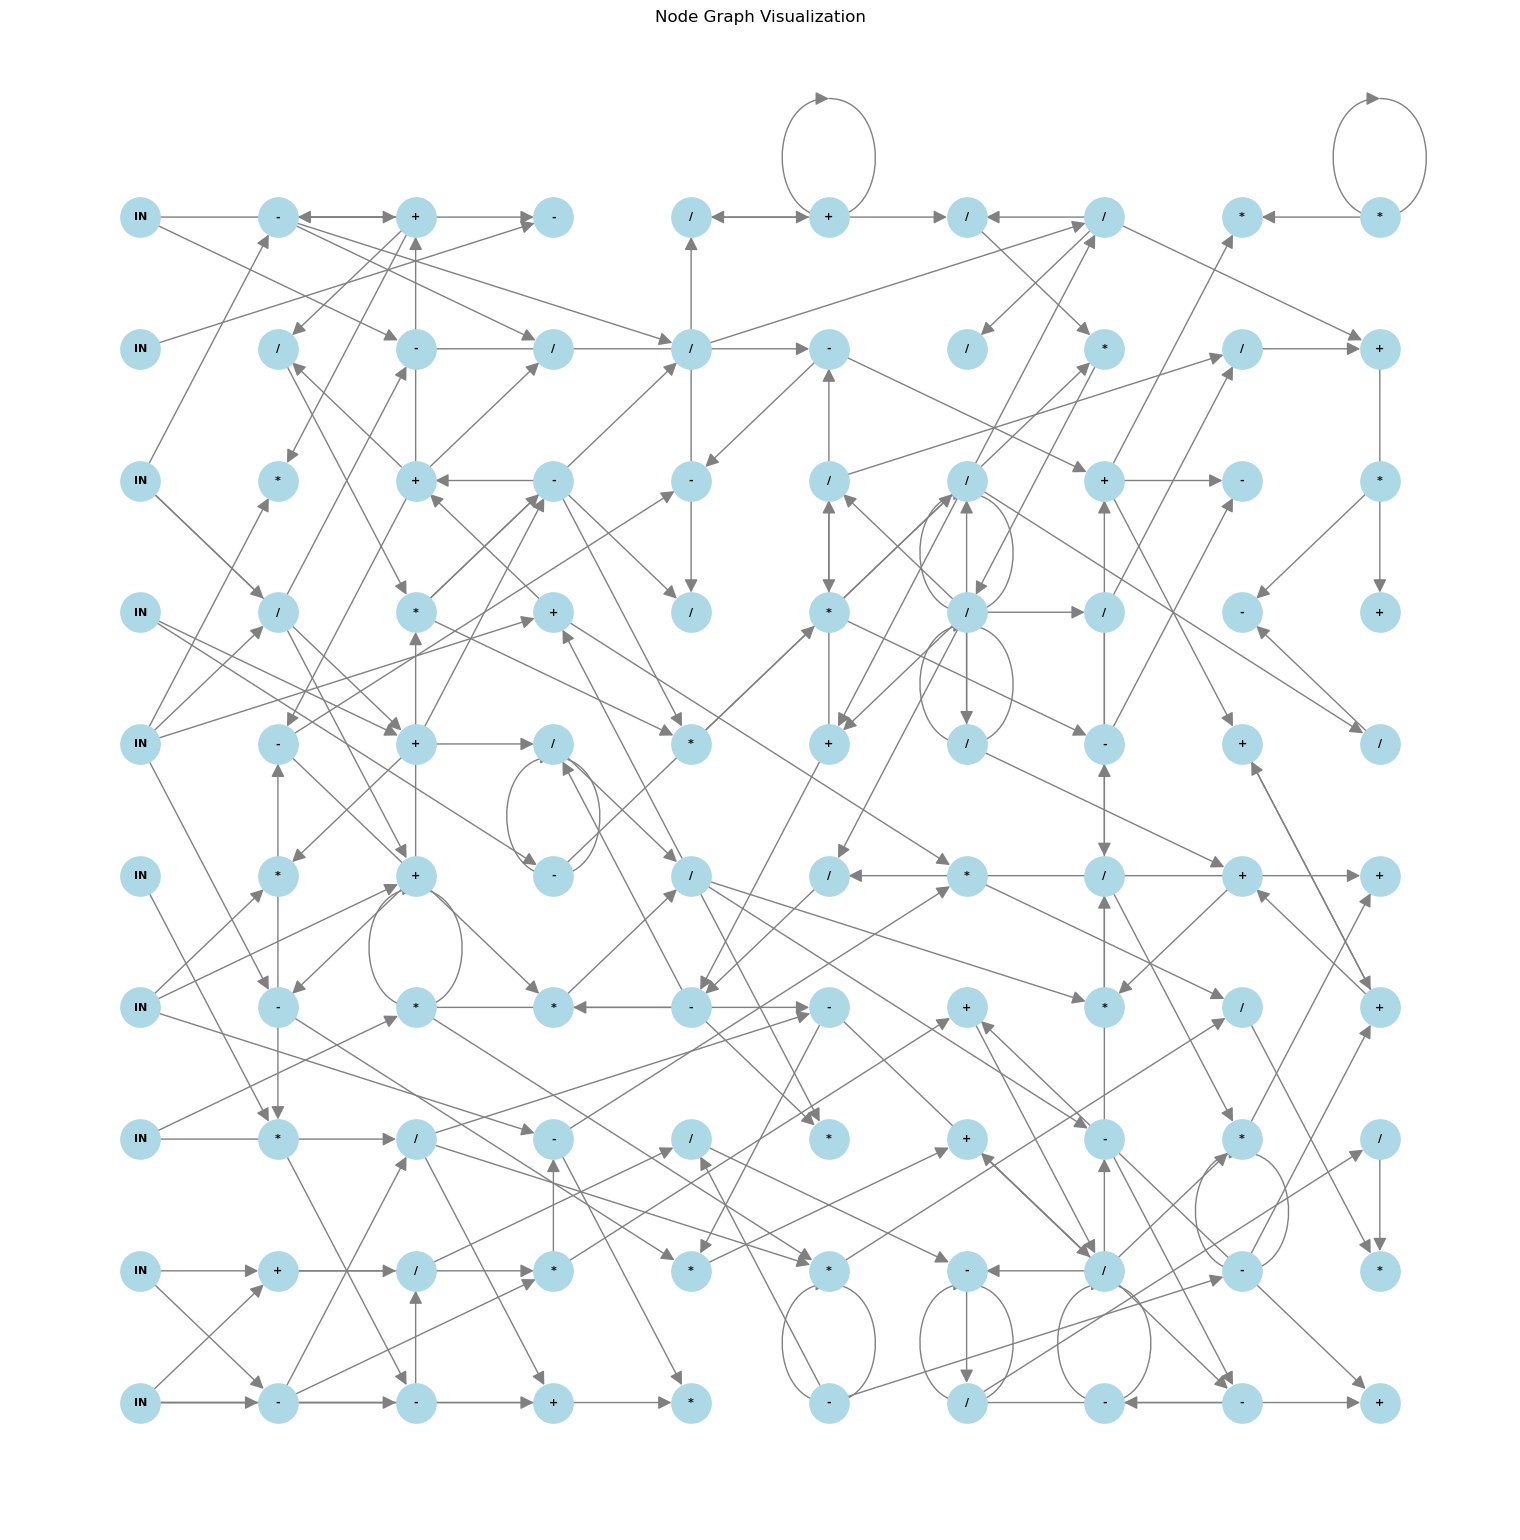

In [254]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = decode_nodes(arr.flatten())

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    node_id = f"N{node.x}_{node.y}"
    G.add_node(node_id, function=op_dict[node.function], pos=(node.x, -node.y))

# Add edges based on connections between nodes
for node in nodes:
    node_id = f"N{node.x}_{node.y}"
    
    # Connect inputs (each node can have up to 4 inputs)
    inputs = [(node.input0x, node.input0y), (node.input1x, node.input1y), 
              (node.input2x, node.input2y), (node.input3x, node.input3y)]
    
    for input_x, input_y in inputs:
        input_node_id = f"N{input_x}_{input_y}"
        if input_node_id in G.nodes():
            G.add_edge(input_node_id, node_id)

# Set up positions and labels for visualization
pos = nx.get_node_attributes(G, 'pos')
labels = {node: G.nodes[node]['function'] for node in G.nodes()}

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G, pos, labels=labels, node_color='lightblue', 
        node_size=800, font_size=8, font_weight='bold', 
        arrows=True, arrowsize=20, edge_color='gray')
plt.title("Node Graph Visualization")
plt.show()

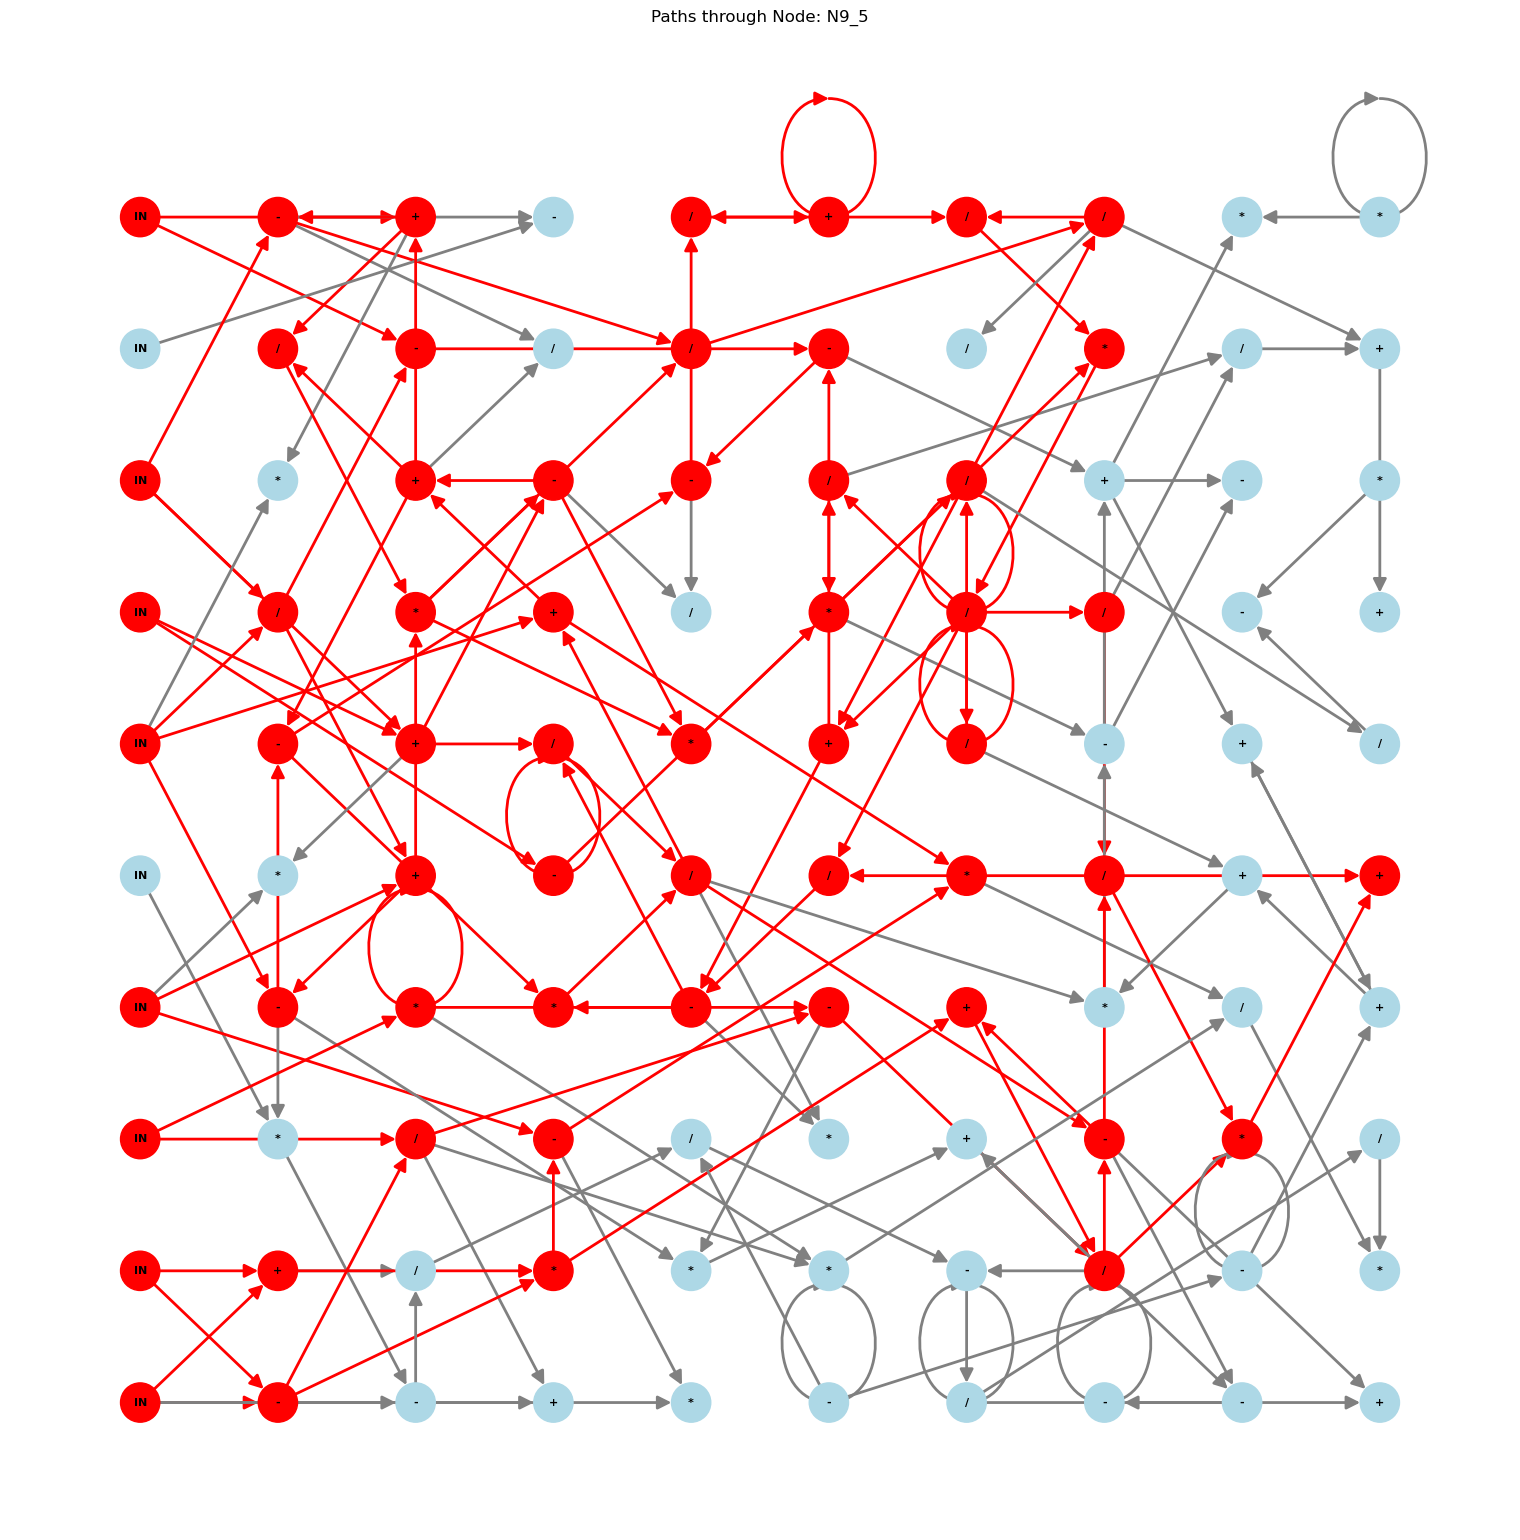

Highlighted 57 nodes in paths through N9_5
Predecessors: 56, Successors: 0


In [255]:
def highlight_path_through_node(G, target_node, pos, labels):
    """
    Highlight all nodes along paths that intersect with a specific target node.
    This includes all predecessors and successors of the target node.
    """
    if target_node not in G.nodes():
        print(f"Node {target_node} not found in graph")
        return
    
    # Get all nodes that are connected to the target node (predecessors and successors)
    predecessors = set(nx.ancestors(G, target_node))
    successors = set(nx.descendants(G, target_node))
    path_nodes = predecessors.union(successors).union({target_node})
    
    # Create node colors: highlight path nodes in red, others in light blue
    node_colors = ['red' if node in path_nodes else 'lightblue' for node in G.nodes()]
    
    # Create edge colors: highlight edges in the path in red, others in gray
    edge_colors = []
    for edge in G.edges():
        if edge[0] in path_nodes and edge[1] in path_nodes:
            edge_colors.append('red')
        else:
            edge_colors.append('gray')
    
    # Plot the graph with highlighting
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, labels=labels, node_color=node_colors, 
            node_size=800, font_size=8, font_weight='bold', 
            arrows=True, arrowsize=20, edge_color=edge_colors,
            width=2)
    plt.title(f"Paths through Node: {target_node}")
    plt.show()
    
    print(f"Highlighted {len(path_nodes)} nodes in paths through {target_node}")
    print(f"Predecessors: {len(predecessors)}, Successors: {len(successors)}")

# Example usage - highlight paths through a specific node
highlight_path_through_node(G, "N9_5", pos, labels)

In [256]:
import time

def visualize_graph_evaluation(G, pos, labels, input_values, target_node="N9_9", step_delay=0.5):
    """
    Visualize the step-by-step evaluation of the graph with given input values.
    Only evaluates nodes that are in the computation path to the target.
    
    Args:
        G: NetworkX DiGraph
        pos: Node positions
        labels: Node labels
        input_values: Dictionary mapping input node IDs to values
        target_node: The final output node to evaluate
        step_delay: Delay between visualization steps
    """
    
    # Initialize node values
    node_values = {}
    evaluated_nodes = set()
    nodes_in_path = set()
    
    # First, find all nodes that are needed for the target computation
    def find_required_nodes(node_id):
        """Find all nodes required to compute the target node."""
        if node_id in nodes_in_path:
            return
        
        nodes_in_path.add(node_id)
        
        # Get the original Node object
        node_obj = None
        for node in nodes:
            if f"N{node.x}_{node.y}" == node_id:
                node_obj = node
                break
        
        if node_obj and node_obj.function != 4:  # Not an input node
            # Get input coordinates
            input_coords = [(node_obj.input0x, node_obj.input0y), 
                           (node_obj.input1x, node_obj.input1y)]
            
            for input_x, input_y in input_coords:
                if input_x is not None and input_y is not None:
                    input_node_id = f"N{input_x}_{input_y}"
                    find_required_nodes(input_node_id)
    
    # Find all nodes needed for computation
    find_required_nodes(target_node)
    print(f"Nodes required for computation: {len(nodes_in_path)}")
    
    # Set input values for nodes in the computation path
    for node_id, value in input_values.items():
        if node_id in G.nodes() and node_id in nodes_in_path:
            node_values[node_id] = value
            evaluated_nodes.add(node_id)
    
    def evaluate_node(node_id):
        """Evaluate a single node based on its inputs and function."""
        if node_id in evaluated_nodes:
            return node_values[node_id]
        
        # Skip if not in required path
        if node_id not in nodes_in_path:
            return None
        
        # Get the original Node object to access input coordinates
        node_obj = None
        for node in nodes:
            if f"N{node.x}_{node.y}" == node_id:
                node_obj = node
                break
        
        if not node_obj:
            return None
        
        # Get input values
        input_coords = [(node_obj.input0x, node_obj.input0y), 
                       (node_obj.input1x, node_obj.input1y)]
        input_vals = []
        
        for input_x, input_y in input_coords:
            if input_x is not None and input_y is not None:
                input_node_id = f"N{input_x}_{input_y}"
                if input_node_id in node_values:
                    input_vals.append(node_values[input_node_id])
                else:
                    # Recursively evaluate input
                    val = evaluate_node(input_node_id)
                    if val is not None:
                        input_vals.append(val)
        
        # Apply operation
        if len(input_vals) >= 2:
            func = node_obj.function
            try:
                if func == 0:  # Addition
                    result = input_vals[0] + input_vals[1]
                elif func == 1:  # Subtraction
                    result = input_vals[0] - input_vals[1]
                elif func == 2:  # Multiplication
                    result = input_vals[0] * input_vals[1]
                elif func == 3:  # Division
                    result = input_vals[0] / input_vals[1] if input_vals[1] != 0 else float('inf')
                else:
                    result = input_vals[0]
                
                node_values[node_id] = result
                evaluated_nodes.add(node_id)
                
                # Visualize current step
                # visualize_step(node_id, result)
                time.sleep(step_delay)
                
                return result
            except:
                return None
        
        return None
    
    def visualize_step(current_node, value):
        """Visualize the current evaluation step."""
        plt.figure(figsize=(15, 15))
        
        # Create a subgraph with only nodes in the computation path
        path_subgraph = G.subgraph(nodes_in_path)
        
        # Create positions for only the nodes in the path
        path_pos = {node: pos[node] for node in nodes_in_path if node in pos}
        
        # Color nodes based on evaluation status
        node_colors = []
        for node in path_subgraph.nodes():
            if node == current_node:
                node_colors.append('green')  # Currently evaluating
            elif node in evaluated_nodes:
                node_colors.append('lightgreen')  # Already evaluated
            else:
                node_colors.append('lightblue')  # In path but not yet evaluated
        
        # Create labels with values for evaluated nodes in the path
        display_labels = {}
        for node in path_subgraph.nodes():
            if node in node_values:
                display_labels[node] = f"{labels[node]}\n{node_values[node]:.2f}"
            else:
                display_labels[node] = labels[node]
        
        nx.draw(path_subgraph, path_pos, labels=display_labels, node_color=node_colors,
                node_size=1000, font_size=6, font_weight='bold',
                arrows=True, arrowsize=20, edge_color='gray')
        
        plt.title(f"Evaluating Node: {current_node} = {value:.2f}" if value is not None else f"Evaluating Node: {current_node}")
        plt.show()
    
    # Start evaluation from target node
    final_result = evaluate_node(target_node)
    visualize_step(target_node, final_result)
    print(f"\nFinal result at {target_node}: {final_result}")
    return final_result

# Generate example input values for all input nodes (column 0)
input_values = {}
for i in range(10):  # 10 rows in the grid
    node_id = f"N0_{i}"
    if node_id in G.nodes():
        input_values[node_id] = np.random.uniform(1.0, 5.0)  # Random values between 1 and 5

print("Generated input values:")
for node_id, value in input_values.items():
    print(f"{node_id}: {value:.2f}")

# Run the visualization
result = visualize_graph_evaluation(G, pos, labels, input_values, "N9_5", step_delay=0)

Generated input values:
N0_0: 3.41
N0_1: 3.44
N0_2: 2.97
N0_3: 3.74
N0_4: 4.31
N0_5: 4.13
N0_6: 1.99
N0_7: 3.00
N0_8: 1.65
N0_9: 1.06
Nodes required for computation: 57


RecursionError: maximum recursion depth exceeded